## 1: Load and Preview the Dataset

In [40]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/Sayalinale/biz-analytics-project/refs/heads/main/raw_sales_data.csv"
data = pd.read_csv(url)

# Preview the dataset
print(data.head())

   Customer_ID  Customer_Name Region  Total_Spend  Purchase_Frequency  \
0          101       John Doe  North         5000                  12   
1          102     Jane Smith  South         3000                   8   
2          103      Sam Brown   East         4500                  10   
3          104  Linda Johnson   West         2500                   5   
4          105    Michael Lee  North         7000                  15   

   Marketing_Spend  Seasonality_Index Churned  
0             2000                1.2      No  
1             1500                1.0     Yes  
2             1800                1.1      No  
3             1000                0.9     Yes  
4             2500                1.3      No  


This cell imports Pandas and loads the dataset from a raw GitHub URL.

The data.head() function displays the first 5 rows to give a quick view of the structure.

well-structured dataset with customer-level sales and marketing attributes, suitable for modeling and analysis.

 ## 2: Check for Missing Values

This code checks each column for missing data using .isnull().sum().

In [41]:
# Count of missing values per column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Customer_ID           0
Customer_Name         0
Region                0
Total_Spend           0
Purchase_Frequency    0
Marketing_Spend       0
Seasonality_Index     0
Churned               0
dtype: int64


This means no imputation is needed, which simplifies preprocessing. 

## 3:Check for Duplicates

In [42]:
# Total number of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")


Total Duplicate Rows: 0


In [43]:
# Total number of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicate_count}")

# Preview duplicate rows (if any)
if duplicate_count > 0:
    print(data[data.duplicated()])



Total Duplicate Rows: 0


In [44]:
# Select numeric columns
numeric_cols = data.select_dtypes(include='number')

# Calculate Z-scores
z_scores = np.abs(zscore(numeric_cols))

# Identify outliers (Z > 3)
outliers = (z_scores > 3)
outlier_rows = outliers.any(axis=1)
print(f"\nTotal Outlier Rows Detected: {outlier_rows.sum()}")

# Optionally view the outlier records
outlier_data = data[outlier_rows]
print(outlier_data.head())



Total Outlier Rows Detected: 0
Empty DataFrame
Columns: [Customer_ID, Customer_Name, Region, Total_Spend, Purchase_Frequency, Marketing_Spend, Seasonality_Index, Churned]
Index: []


1. Impute (fill) missing values for numerical columns:

In [45]:
# Impute numerical columns
for col in ['Total_Spend', 'Purchase_Frequency']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mean())

# Impute categorical columns
for col in ['Region', 'Customer_Name']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])


In [46]:
if 'Region' in data.columns:
    data['Region'] = data['Region'].str.strip().str.title()

if 'Customer_Name' in data.columns:
    data['Customer_Name'] = data['Customer_Name'].str.strip().str.title()


In [47]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())

print("\nCleaned data preview:")
print(data.head())



Missing values after cleaning:
Customer_ID           0
Customer_Name         0
Region                0
Total_Spend           0
Purchase_Frequency    0
Marketing_Spend       0
Seasonality_Index     0
Churned               0
dtype: int64

Cleaned data preview:
   Customer_ID  Customer_Name Region  Total_Spend  Purchase_Frequency  \
0          101       John Doe  North         5000                  12   
1          102     Jane Smith  South         3000                   8   
2          103      Sam Brown   East         4500                  10   
3          104  Linda Johnson   West         2500                   5   
4          105    Michael Lee  North         7000                  15   

   Marketing_Spend  Seasonality_Index Churned  
0             2000                1.2      No  
1             1500                1.0     Yes  
2             1800                1.1      No  
3             1000                0.9     Yes  
4             2500                1.3      No  


Save cleaned dataset to local drive

In [48]:
import os  # Add this import at the beginning of your code

local_folder = r"D:\Sayali\Job Applications\UpTrail Internship\Wekk 3"
local_file = os.path.join(local_folder, "cleaned_sales_data.csv")

# Create folder if it doesn't exist
os.makedirs(local_folder, exist_ok=True)

# Save the cleaned file
data.to_csv(local_file, index=False)

print(f"✅ File saved to: {local_file}")

PermissionError: [Errno 13] Permission denied: 'D:\\Sayali\\Job Applications\\UpTrail Internship\\Wekk 3\\cleaned_sales_data.csv'

## 4. Linear Regression 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Feature and target selection
X = data[['Marketing_Spend', 'Seasonality_Index']]
y = data['Total_Spend']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction and evaluation
y_pred = lr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.7932581750365789
RMSE: 422.1203742895485


C:\Users\sayali\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


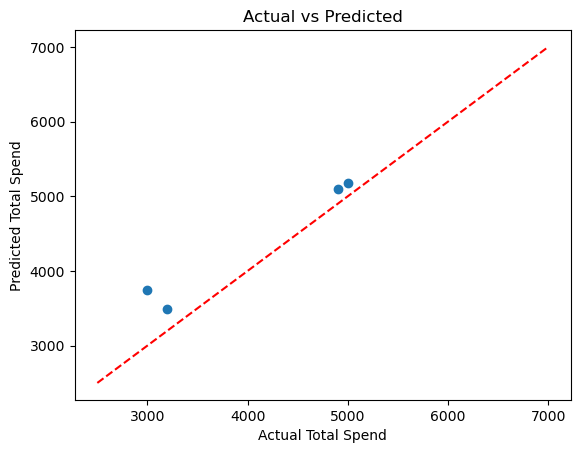

In [49]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

## 5. Logistics Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend']]
y = data['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## 6. ANOVA Test

In [23]:
from scipy.stats import f_oneway

groups = [group["Total_Spend"].values for name, group in data.groupby("Region")]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 39.719626168224295
p-value: 1.6512569414092805e-06


## 7. Hypothesis Testing

In [104]:
# Assume promotion = high marketing spend (you could define threshold)
promo = data[data['Marketing_Spend'] > data['Marketing_Spend'].median()]['Total_Spend']
non_promo = data[data['Marketing_Spend'] <= data['Marketing_Spend'].median()]['Total_Spend']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(promo, non_promo)
print("T-statistic:", t_stat)
print("p-value:", p_value)


T-statistic: 8.018868232385392
p-value: 1.3323981353003831e-06


## 8. Factor analysis

In [26]:
from sklearn.decomposition import FactorAnalysis

features = data[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']]
fa = FactorAnalysis(n_components=2)
factors = fa.fit_transform(features)

print("Factor Loadings:\n", fa.components_)

Factor Loadings:
 [[ 1.35137495e+03  3.01820348e+00  4.58477553e+02  1.41543085e-01]
 [-3.35929661e+01  6.69026339e-01  9.89814803e+01  3.10601947e-02]]


## 9. Decesion Tree

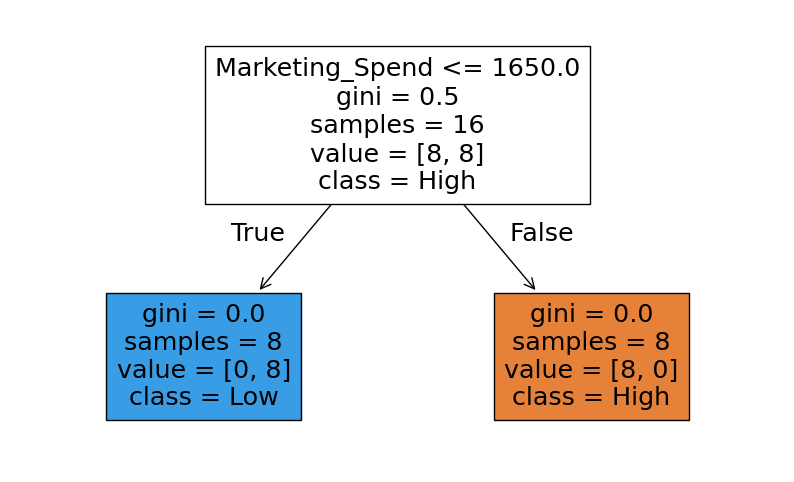

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Example: Segment based on 'Total_Spend' threshold (high/low)
data['Segment'] = ['High' if x > data['Total_Spend'].median() else 'Low' for x in data['Total_Spend']]

X = data[['Purchase_Frequency', 'Marketing_Spend']]
y = data['Segment']

tree = DecisionTreeClassifier()
tree.fit(X, y)

plt.figure(figsize=(10,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


## 10. Clustering

In [34]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
   
from sklearn.cluster import KMeans

X = data[['Total_Spend', 'Purchase_Frequency']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

print(data[['Customer_ID', 'Cluster']])


    Customer_ID  Cluster
0           101        1
1           102        0
2           103        1
3           104        0
4           105        2
5           106        0
6           107        1
7           108        0
8           109        2
9           110        0
10          111        1
11          112        0
12          113        1
13          114        0
14          115        1
15          116        0


## 11. Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier

X = data[['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend']]
y = data['Churned']

rf = RandomForestClassifier()
rf.fit(X, y)

print("Random Forest Accuracy:", rf.score(X, y))


Random Forest Accuracy: 1.0


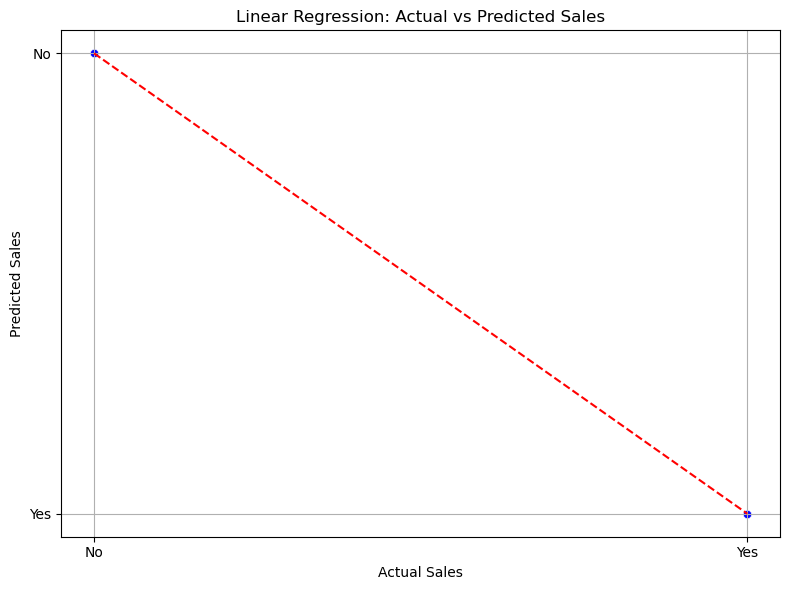

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


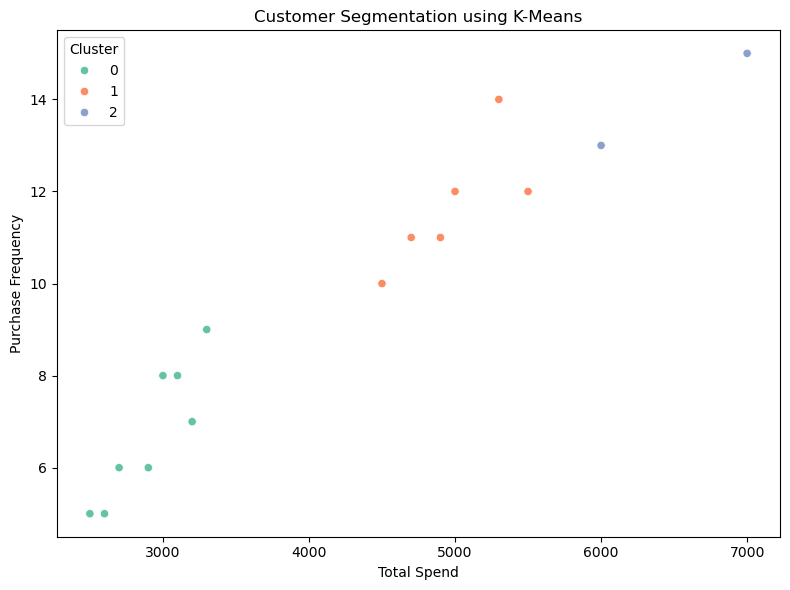

In [110]:
# Assuming KMeans has already been fitted with 3 clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Total_Spend', y='Purchase_Frequency', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


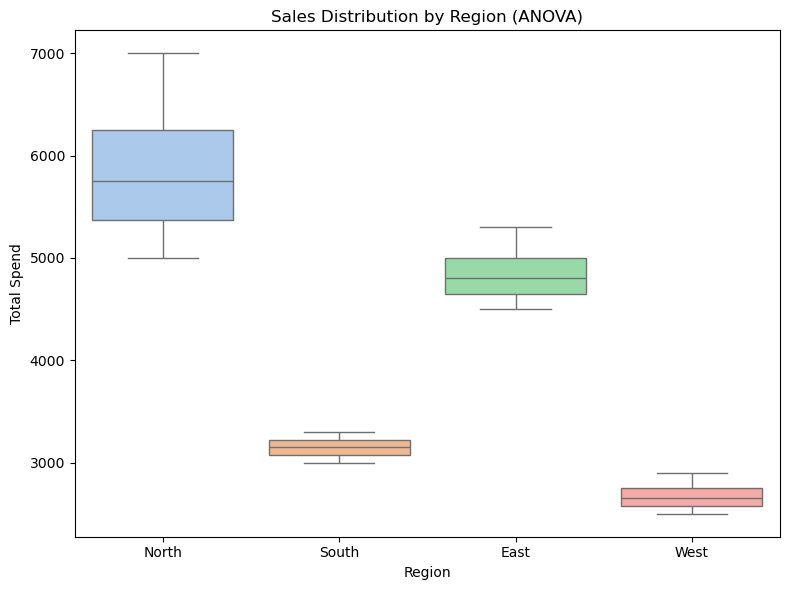

In [111]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Total_Spend', data=data, hue='Region', palette='pastel', legend=False)
plt.title('Sales Distribution by Region (ANOVA)')
plt.xlabel('Region')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()